In [1]:
# Если загрузка из интернета по определенной ссылке (здесь ссылка на github)
import pandas as pd
url = 'https://raw.githubusercontent.com/Chyortik/big_data/master/data.csv'
df = pd.read_csv(url)
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
# если скачивать с kaggle (потребуется логин и ключ)
import opendatasets as od
import time
from pathlib import Path
dataset_path = Path('big_data', 'data.csv')
if not dataset_path.is_file():
    od.download('https://www.kaggle.com/datasets/CooperUnion/cardataset')

Skipping, found downloaded files in ".\cardataset" (use force=True to force download)


In [ ]:
df = pd.read_csv('./cardataset/data.csv')
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [2]:
c = df[['Make', 'Model', 'MSRP']]
c

,Make,Model,MSRP
0,BMW,1 Series M,46135
1,BMW,1 Series,40650
2,BMW,1 Series,36350
3,BMW,1 Series,29450
4,BMW,1 Series,34500
...,...,...,...
11909,Acura,ZDX,46120
11910,Acura,ZDX,56670
11911,Acura,ZDX,50620
11912,Acura,ZDX,50920


In [3]:
c.to_csv('car_price.csv')

In [4]:
df1 = pd.read_csv('car_price.csv')
df1

,Unnamed: 0,Make,Model,MSRP
0,0,BMW,1 Series M,46135
1,1,BMW,1 Series,40650
2,2,BMW,1 Series,36350
3,3,BMW,1 Series,29450
4,4,BMW,1 Series,34500
...,...,...,...,...
11909,11909,Acura,ZDX,46120
11910,11910,Acura,ZDX,56670
11911,11911,Acura,ZDX,50620
11912,11912,Acura,ZDX,50920


In [6]:
df1.groupby('Model').mean()

<ipython-input-6-6a6bc6c9e99d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby('Model').mean()


,Unnamed: 0,MSRP
Model,,
1 Series,8.5,37853.125000
1 Series M,0.0,46135.000000
100,24.0,2000.000000
124 Spider,33.0,26895.000000
190-Class,37.5,2000.000000
...,...,...
iQ,5960.5,16168.750000
tC,10311.5,21546.428571
xA,11537.5,12996.666667


In [11]:
df1.groupby('Model').mean().reset_index()

<ipython-input-11-47657e068ea4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby('Model').mean().reset_index()


,Model,Unnamed: 0,MSRP
0,1 Series,8.5,37853.125000
1,1 Series M,0.0,46135.000000
2,100,24.0,2000.000000
3,124 Spider,33.0,26895.000000
4,190-Class,37.5,2000.000000
...,...,...,...
910,iQ,5960.5,16168.750000
911,tC,10311.5,21546.428571
912,xA,11537.5,12996.666667
913,xB,11545.5,18444.500000


In [7]:
str_min = df1[df1['MSRP'] == df1['MSRP'].min()]
print(str_min)

       Unnamed: 0    Make Model  MSRP
17             17    Audi   100  2000
18             18    Audi   100  2000
19             19    Audi   100  2000
20             20    Audi   100  2000
21             21    Audi   100  2000
...           ...     ...   ...   ...
11481       11481  Suzuki  X-90  2000
11482       11482  Suzuki  X-90  2000
11792       11792  Subaru    XT  2000
11793       11793  Subaru    XT  2000
11794       11794  Subaru    XT  2000

[1036 rows x 4 columns]


In [ ]:
str_max = df1[df1['MSRP'] == df1['MSRP'].max()]
print(str_max)

       Unnamed: 0     Make        Model     MSRP
11362       11362  Bugatti  Veyron 16.4  2065902


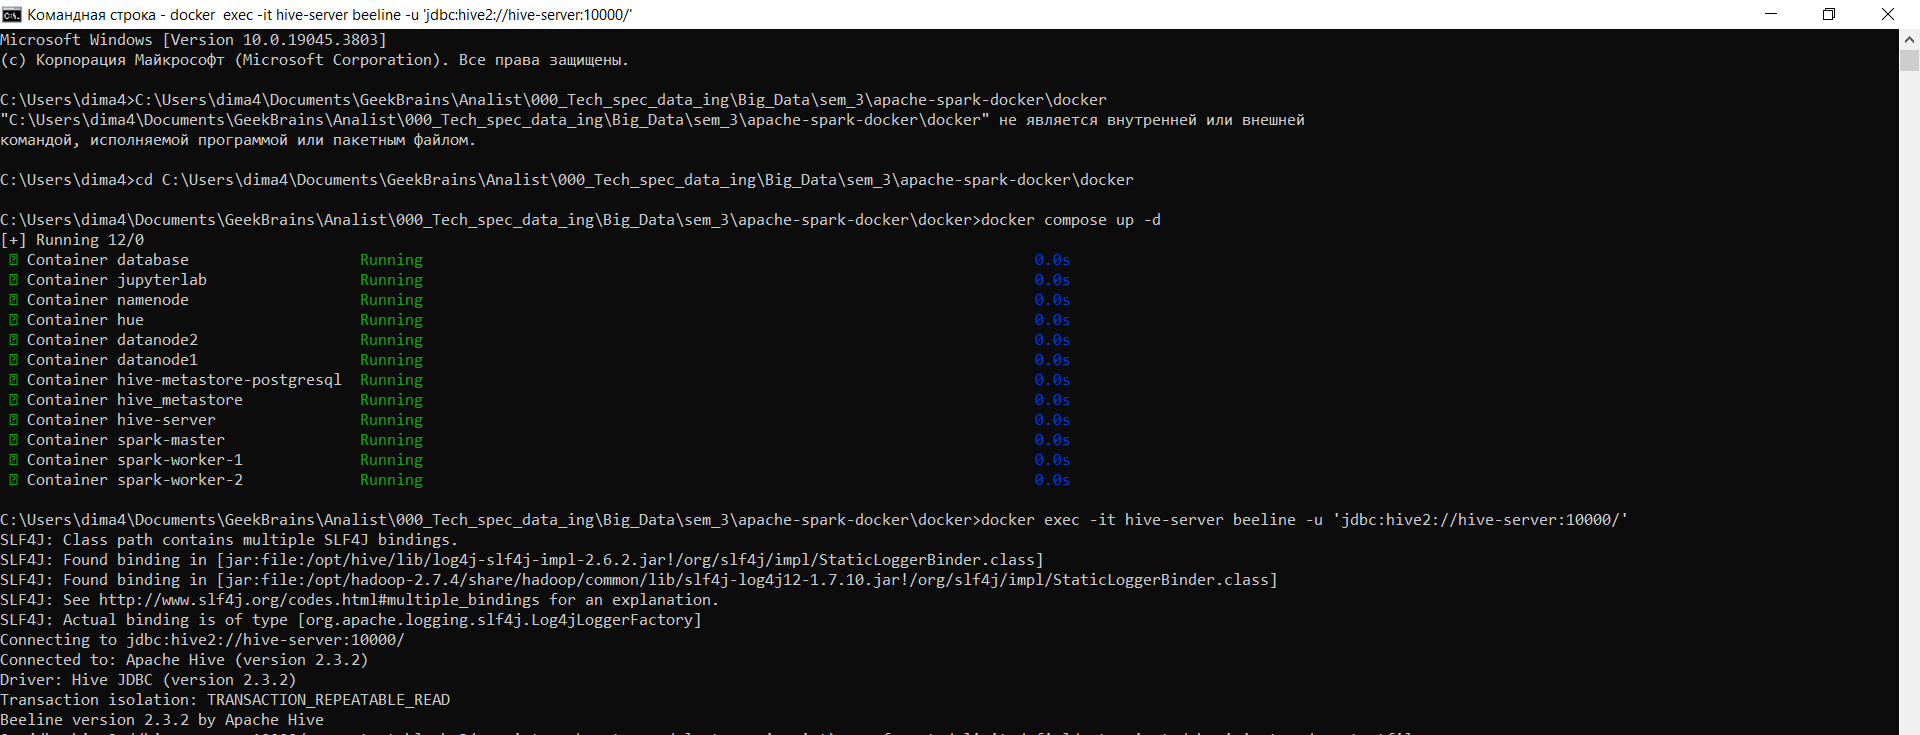

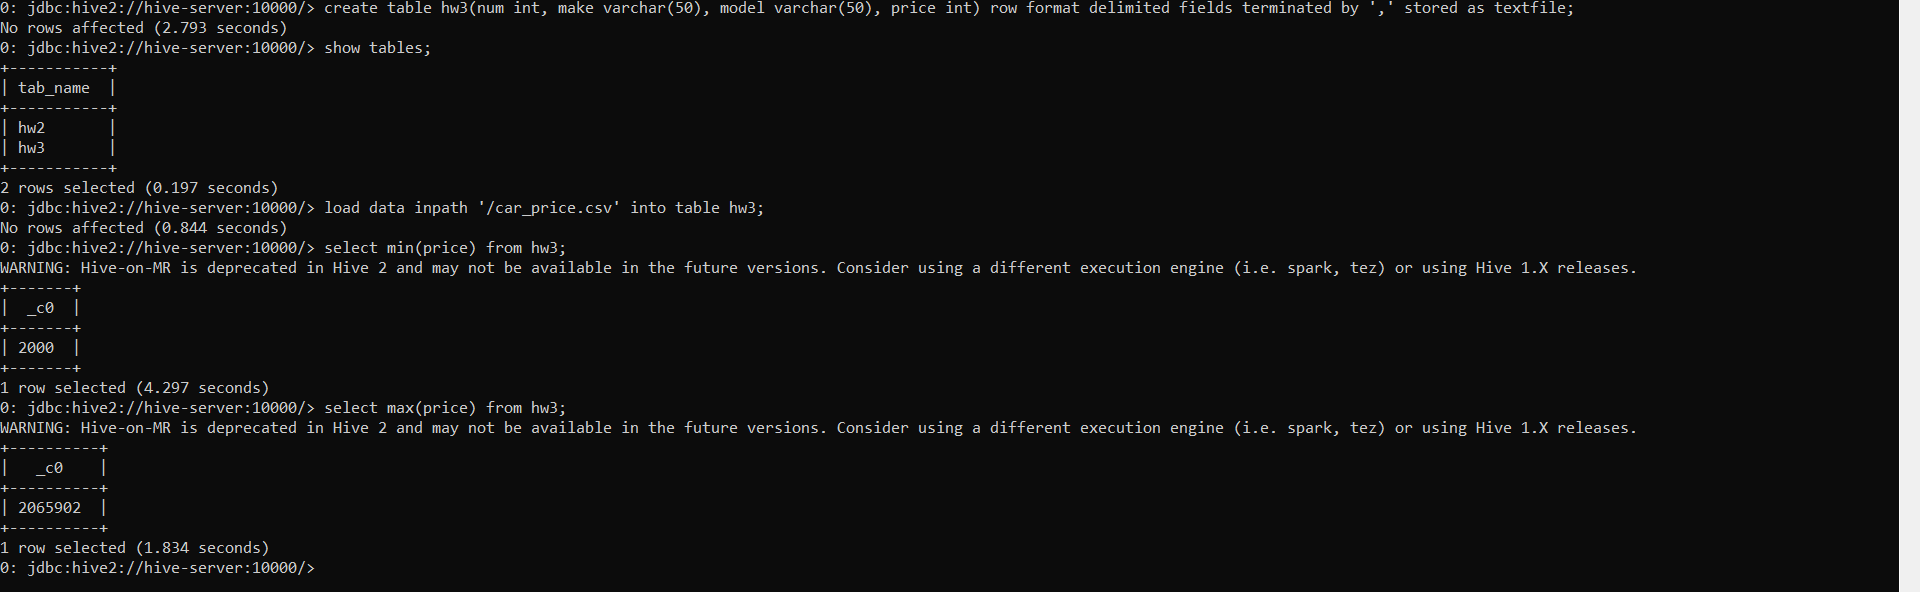